In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

/Users/ZMCodi/miniforge3/envs/quantecon/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
DATA_DAY_1 = "../data/round-4-island-data-bottle/prices_round_4_day_1.csv"
DATA_DAY_2 = "../data/round-4-island-data-bottle/prices_round_4_day_2.csv"
DATA_DAY_3 = "../data/round-4-island-data-bottle/prices_round_4_day_3.csv"

OBS_DATA_DAY_1 = "../data/round-4-island-data-bottle/observations_round_4_day_1.csv"
OBS_DATA_DAY_2 = "../data/round-4-island-data-bottle/observations_round_4_day_2.csv"
OBS_DATA_DAY_3 = "../data/round-4-island-data-bottle/observations_round_4_day_3.csv"

TRADE_DATA_DAY_1 = "../data/round-4-island-data-bottle/trades_round_4_day_1.csv"
TRADE_DATA_DAY_2 = "../data/round-4-island-data-bottle/trades_round_4_day_2.csv"
TRADE_DATA_DAY_3 = "../data/round-4-island-data-bottle/trades_round_4_day_3.csv"

df0 = pd.read_csv(DATA_DAY_1, sep=';')
df1 = pd.read_csv(DATA_DAY_2, sep=';')
df2 =  pd.read_csv(DATA_DAY_3, sep=';')

odf0 = pd.read_csv(OBS_DATA_DAY_1, sep=',')
odf1 = pd.read_csv(OBS_DATA_DAY_2, sep=',')
odf2 = pd.read_csv(OBS_DATA_DAY_3, sep=',')

# Adjust timestamps for odf1 and odf2
odf1['timestamp'] += 1000000  # Start after odf0 ends
odf2['timestamp'] += 2000000  # Start after odf1 ends

tdf0 = pd.read_csv( TRADE_DATA_DAY_1, sep=';')
tdf1 = pd.read_csv( TRADE_DATA_DAY_2, sep=';')
tdf2 =  pd.read_csv(TRADE_DATA_DAY_3, sep=';')

df = pd.concat([df0, df1, df2])
df.set_index(['day', 'timestamp', 'product'], inplace=True)

odf = pd.concat([odf0, odf1, odf2])
odf.set_index(["timestamp"], inplace=True)

tdf = pd.concat([tdf0, tdf1, tdf2])
tdf.set_index(['timestamp', 'symbol'], inplace=True)

In [3]:
odf['midPrice'] = (odf['askPrice'] + odf['bidPrice']) / 2
odf

,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,midPrice
timestamp,,,,,,,,
0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,627.75
100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,630.75
200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,630.75
300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,632.75
400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,631.25
...,...,...,...,...,...,...,...,...
2999500,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95,798.25
2999600,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96,802.25
2999700,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97,804.75


Correlations with midPrice:
midPrice         1.000000
askPrice         1.000000
bidPrice         1.000000
sugarPrice       0.455978
exportTariff     0.203572
transportFees   -0.163106
importTariff    -0.479421
sunlightIndex   -0.552143
Name: midPrice, dtype: float64

Correlation between sugarPrice and sunlightIndex: -0.476937

Linear Regression Results:

sugarPrice:
  Coefficient: 5.067339
  R-squared: 0.207916
  Equation: midPrice = 5.0673 × sugarPrice + -360.9881

sunlightIndex:
  Coefficient: -3.985587
  R-squared: 0.304862
  Equation: midPrice = -3.9856 × sunlightIndex + 883.5121

transportFees:
  Coefficient: -32.424879
  R-squared: 0.026603
  Equation: midPrice = -32.4249 × transportFees + 714.7906

exportTariff:
  Coefficient: 22.089910
  R-squared: 0.041442
  Equation: midPrice = 22.0899 × exportTariff + 439.0980

importTariff:
  Coefficient: -32.166309
  R-squared: 0.229845
  Equation: midPrice = -32.1663 × importTariff + 545.3368

Multiple Linear Regression Results:
R-squared

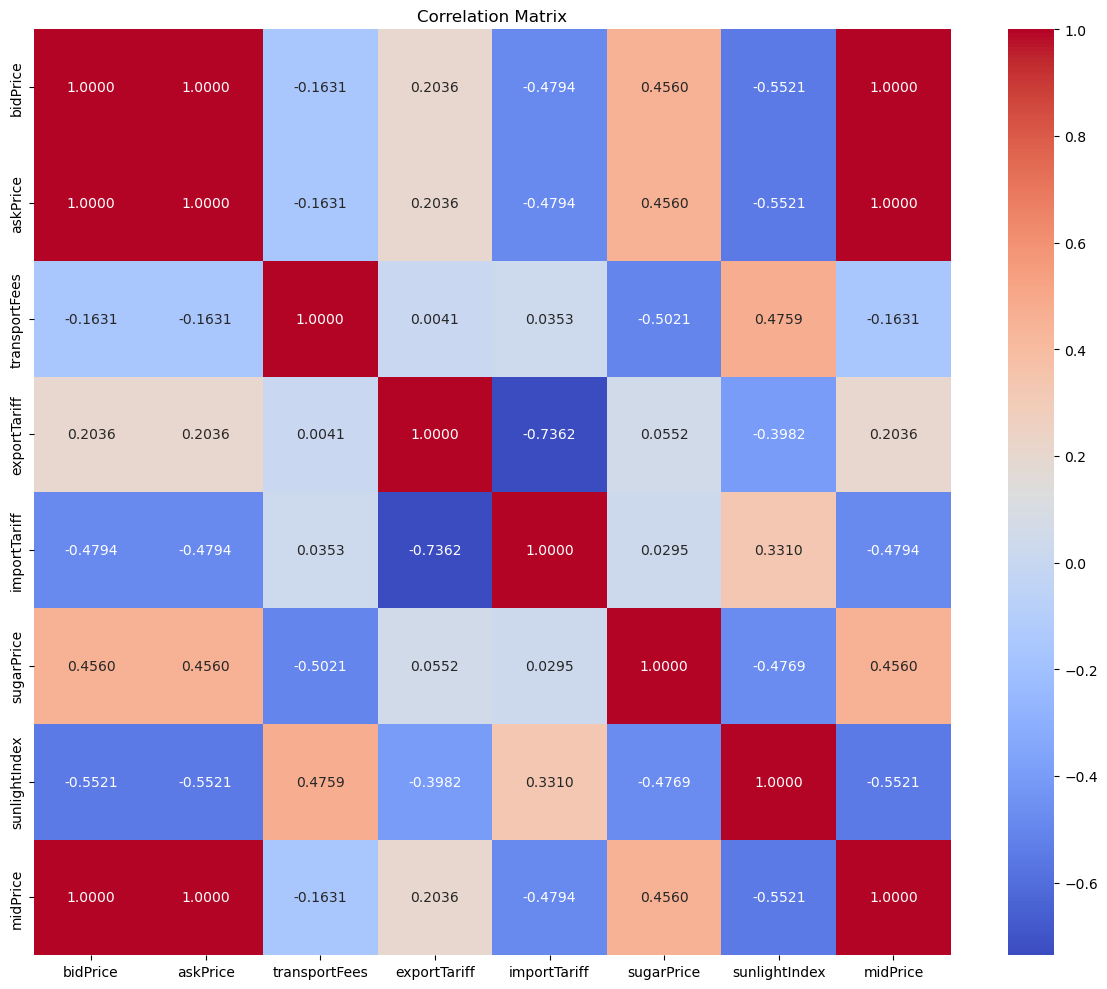

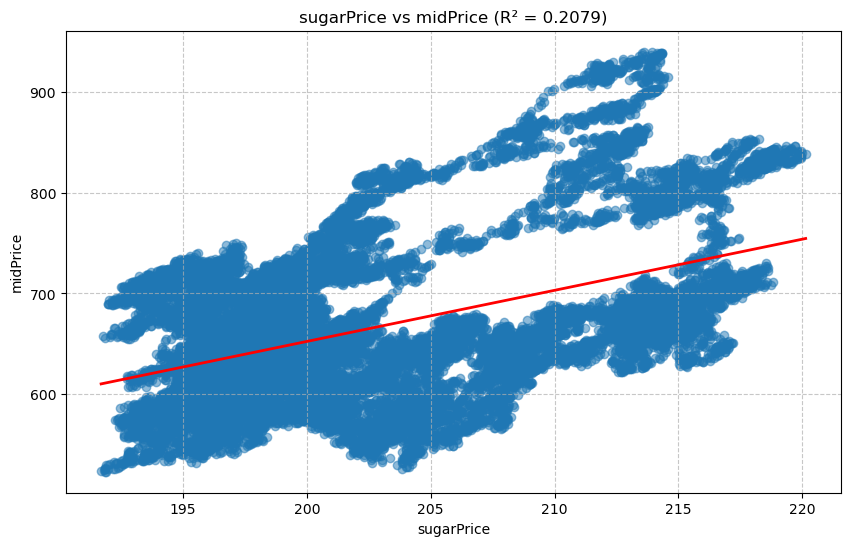

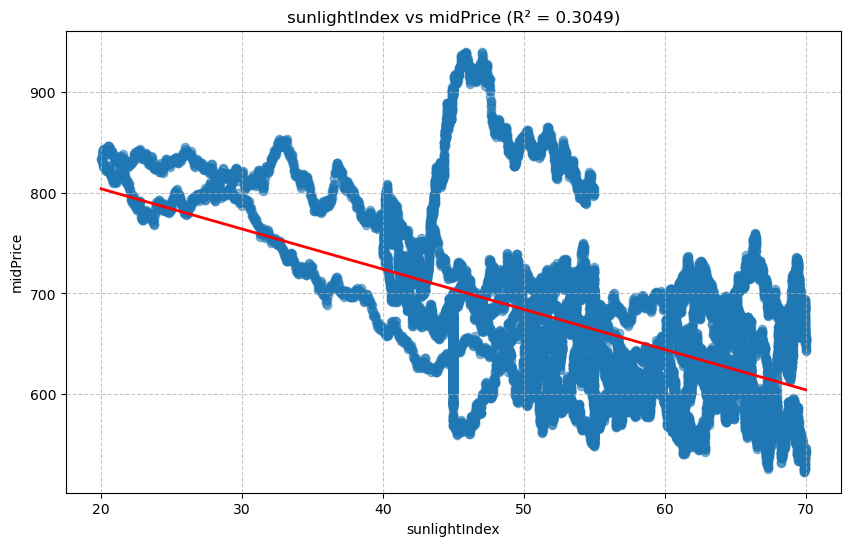

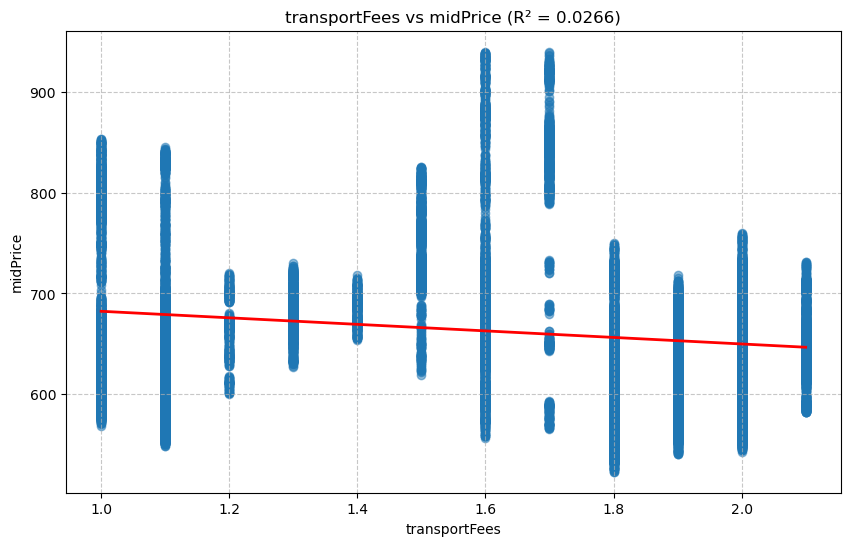

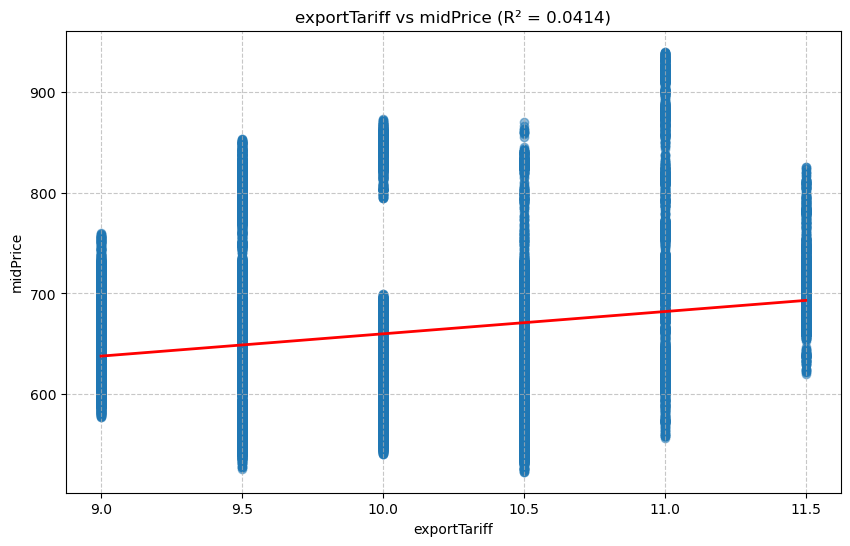

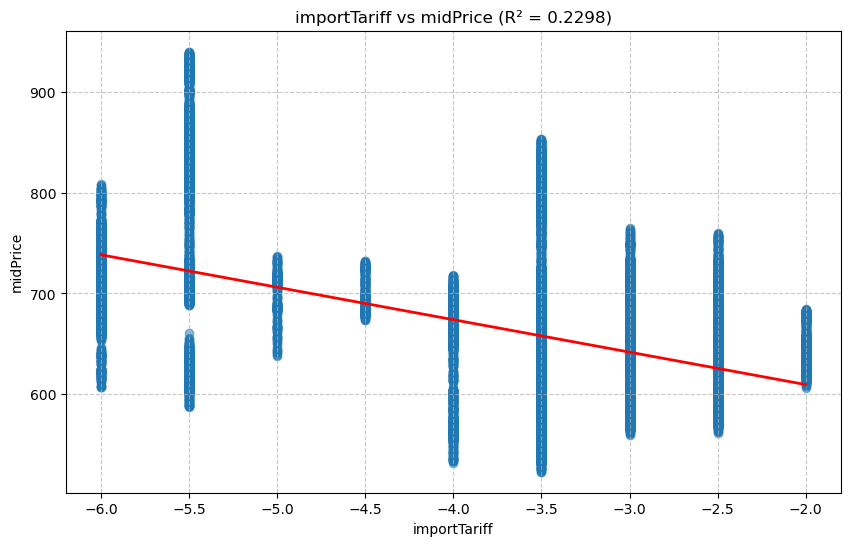

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate midPrice if not already present
if 'midPrice' not in odf.columns:
    odf['midPrice'] = (odf['bidPrice'] + odf['askPrice']) / 2

# Calculate correlations with midPrice
correlations = odf.corr()['midPrice'].sort_values(ascending=False)
print("Correlations with midPrice:")
print(correlations)

# Correlation between sugarPrice and sunlightIndex
sugar_sunlight_corr = odf['sugarPrice'].corr(odf['sunlightIndex'])
print(f"\nCorrelation between sugarPrice and sunlightIndex: {sugar_sunlight_corr:.6f}")

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(odf.corr(), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# Linear regression for key relationships
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
target = 'midPrice'

# Function to perform linear regression and plot results
def perform_regression(feature, target):
    X = odf[feature].values.reshape(-1, 1)
    y = odf[target].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate R-squared
    r_squared = model.score(X, y)
    
    # Generate predictions for plotting
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.plot(x_range, y_pred, color='red', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target} (R² = {r_squared:.4f})')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f'regression_{feature}_{target}.png')
    
    return {
        'feature': feature,
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': r_squared,
        'equation': f"{target} = {model.coef_[0]:.4f} × {feature} + {model.intercept_:.4f}"
    }

# Perform regression for each feature
regression_results = {}
for feature in features:
    regression_results[feature] = perform_regression(feature, target)

# Display regression results
print("\nLinear Regression Results:")
for feature, result in regression_results.items():
    print(f"\n{feature}:")
    print(f"  Coefficient: {result['coefficient']:.6f}")
    print(f"  R-squared: {result['r_squared']:.6f}")
    print(f"  Equation: {result['equation']}")

# Multiple linear regression with all features
X_multi = odf[features]
y_multi = odf[target]

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Display multiple regression results
print("\nMultiple Linear Regression Results:")
print(f"R-squared: {model_multi.score(X_multi, y_multi):.6f}")
print("Coefficients:")
for feature, coef in zip(features, model_multi.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"Intercept: {model_multi.intercept_:.6f}")

# Create equation string
equation = f"{target} = "
for feature, coef in zip(features, model_multi.coef_):
    equation += f"{coef:.4f} × {feature} + "
equation += f"{model_multi.intercept_:.4f}"
print(f"Equation: {equation}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Calculate midPrice if not already present
if 'midPrice' not in odf.columns:
    odf['midPrice'] = (odf['bidPrice'] + odf['askPrice']) / 2

# Split the data: 2/3 for training, 1/3 for testing
train_df, test_df = train_test_split(odf, test_size=1/3, random_state=42)

# Define features and target
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
target = 'midPrice'

# Train the model on 2/3 of the data
X_train = train_df[features]
y_train = train_df[target]
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("Model Coefficients:")
print(coefficients)
print(f"Intercept: {model.intercept_:.6f}")

# Create equation string
equation = f"{target} = "
for feature, coef in zip(features, model.coef_):
    equation += f"{coef:.4f} × {feature} + "
equation += f"{model.intercept_:.4f}"
print(f"\nRegression Equation: {equation}")

# Test the model on the remaining 1/3 of data
X_test = test_df[features]
y_test = test_df[target]
y_pred = model.predict(X_test)

# Add predictions to the test dataframe
test_df['predicted_midPrice'] = y_pred
test_df['prediction_error'] = test_df['predicted_midPrice'] - test_df[target]

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Mean Squared Error: {mse:.6f}")
print(f"R-squared: {r2:.6f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.6f}")

# Summary statistics of prediction errors
error_stats = test_df['prediction_error'].describe()
print("\nPrediction Error Statistics:")
print(error_stats)

# Calculate correlations on the entire dataset
correlations = odf.corr()['midPrice'].sort_values(ascending=False)
print("\nCorrelations with midPrice:")
print(correlations)

# Sugar-Sunlight correlation
sugar_sunlight_corr = odf['sugarPrice'].corr(odf['sunlightIndex'])
print(f"\nCorrelation between sugarPrice and sunlightIndex: {sugar_sunlight_corr:.6f}")

Model Coefficients:
         Feature  Coefficient
0     sugarPrice     4.962459
1  sunlightIndex    -3.293858
2  transportFees    61.513413
3   exportTariff   -62.498789
4   importTariff   -52.443617
Intercept: 187.468729

Regression Equation: midPrice = 4.9625 × sugarPrice + -3.2939 × sunlightIndex + 61.5134 × transportFees + -62.4988 × exportTariff + -52.4436 × importTariff + 187.4687

Model Performance on Test Data:
Mean Squared Error: 1901.815735
R-squared: 0.656029
Root Mean Squared Error: 43.609812

Prediction Error Statistics:
count    10000.000000
mean         0.502314
std         43.609100
min       -138.501409
25%        -26.821517
50%         -2.802989
75%         26.444015
max        151.064758
Name: prediction_error, dtype: float64

Correlations with midPrice:
midPrice         1.000000
askPrice         1.000000
bidPrice         1.000000
sugarPrice       0.455978
exportTariff     0.203572
transportFees   -0.163106
importTariff    -0.479421
sunlightIndex   -0.552143
Name: mi

In [7]:
odf['estMidPrice'] = 4.9625 * odf["sugarPrice"] + -3.2939 * odf["sunlightIndex"] + 61.5134 * odf["transportFees"] + -62.4988 * odf["exportTariff"] + -52.4436 * odf["importTariff"] + 187.4687
odf

,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,midPrice,estMidPrice
timestamp,,,,,,,,,
0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,627.75,638.689700
100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,630.75,639.178235
200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,630.75,639.205377
300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,632.75,640.405853
400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,631.25,639.656926
...,...,...,...,...,...,...,...,...,...
2999500,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95,798.25,858.412779
2999600,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96,802.25,858.492649
2999700,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97,804.75,858.729850


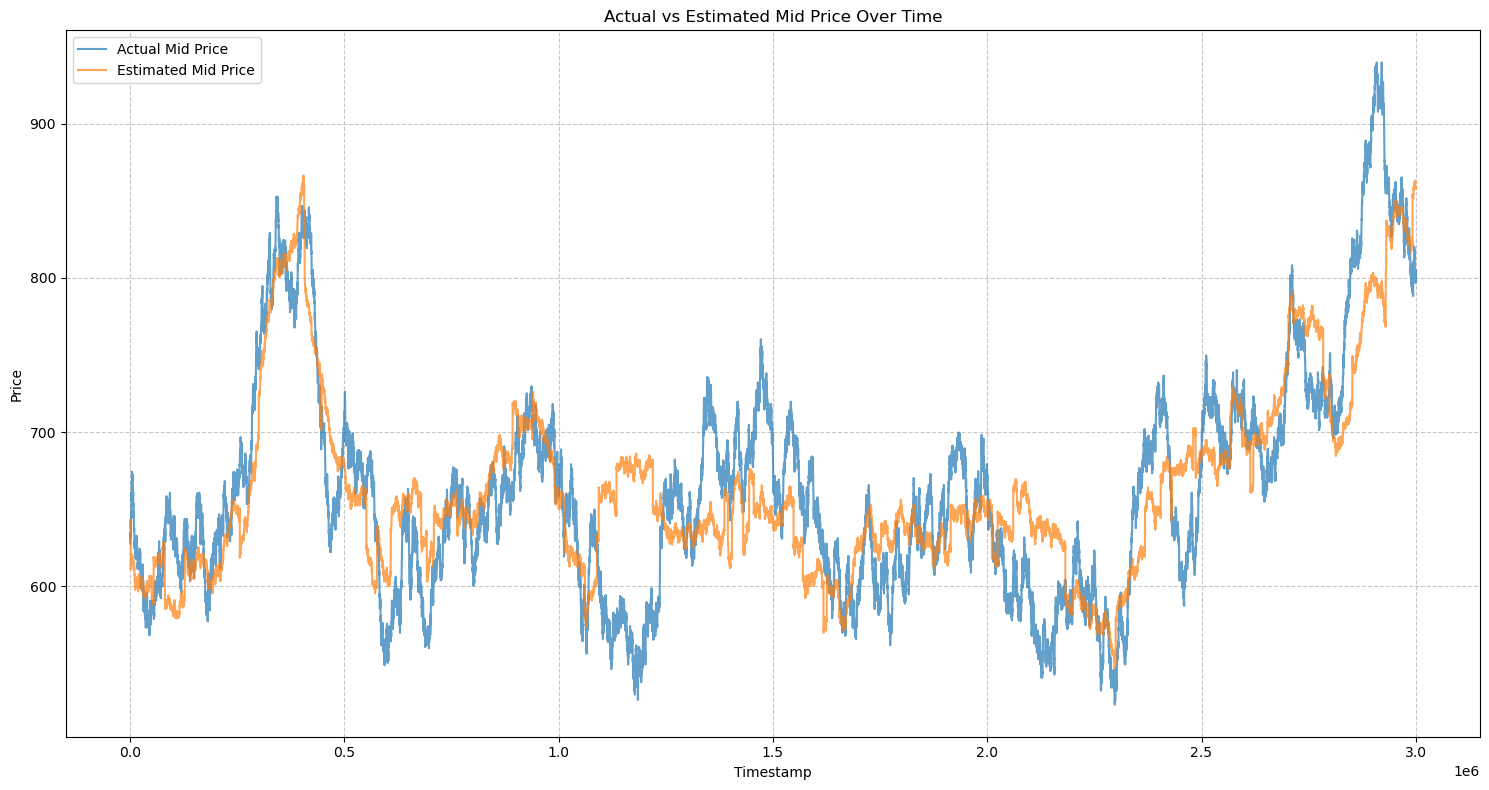

In [8]:
plt.figure(figsize=(15, 8))

# Plot actual midPrice
plt.plot(odf.index, odf['midPrice'], label='Actual Mid Price', alpha=0.7)
plt.plot(odf.index, odf['estMidPrice'], label='Estimated Mid Price', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual vs Estimated Mid Price Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

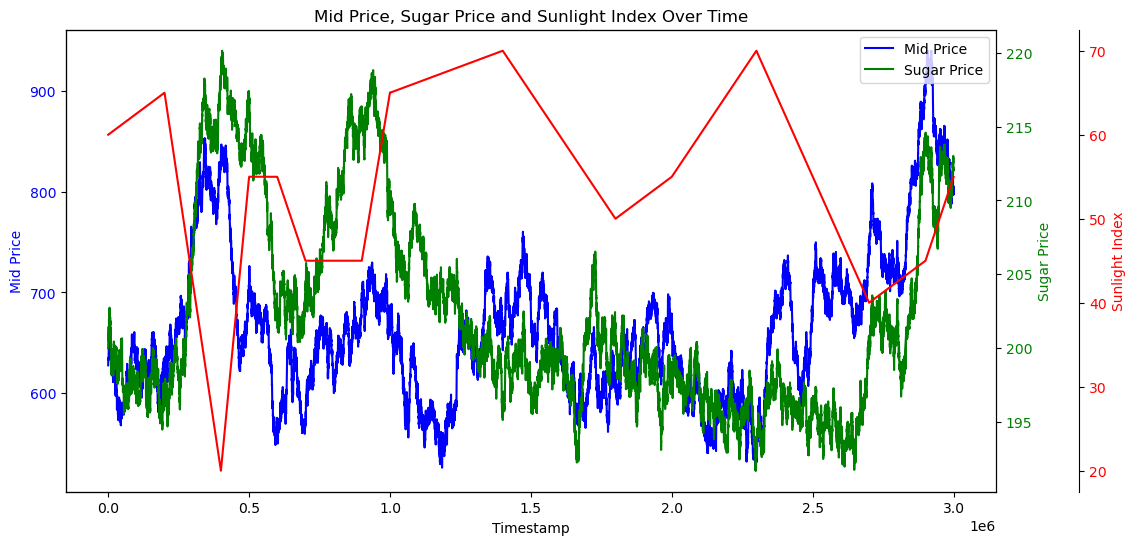

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mid price on primary y-axis
ax1.plot(odf.index, (odf['bidPrice'] + odf['askPrice'])/2, label='Mid Price', color='blue')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Mid Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for sugar price
ax2 = ax1.twinx()
ax2.plot(odf.index, odf['sugarPrice'], label='Sugar Price', color='green')
ax2.set_ylabel('Sugar Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create third y-axis for sunlight index
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
ax3.plot(odf.index, odf['sunlightIndex'], label='Sunlight Index', color='red')
ax3.set_ylabel('Sunlight Index', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Mid Price, Sugar Price and Sunlight Index Over Time')
plt.show()

In [20]:
tdf

buyer  seller   currency    price  \
timestamp symbol                                                           
0         RAINFOREST_RESIN               NaN     NaN  SEASHELLS  10008.0   
100       KELP                           NaN     NaN  SEASHELLS   2034.0   
          RAINFOREST_RESIN               NaN     NaN  SEASHELLS   9992.0   
          SQUID_INK                      NaN     NaN  SEASHELLS   1838.0   
200       JAMS                           NaN     NaN  SEASHELLS   6542.0   
...                                      ...     ...        ...      ...   
999800    VOLCANIC_ROCK_VOUCHER_10500    NaN     NaN  SEASHELLS      0.0   
          VOLCANIC_ROCK_VOUCHER_9500     NaN     NaN  SEASHELLS    419.0   
          VOLCANIC_ROCK_VOUCHER_9500     NaN     NaN  SEASHELLS    419.0   
          VOLCANIC_ROCK_VOUCHER_9750     NaN     NaN  SEASHELLS    184.0   
          VOLCANIC_ROCK_VOUCHER_9750     NaN     NaN  SEASHELLS    184.0   

                                       quantity  
timestamp symbol                                 
0         RAINFOREST_RESIN                    6  
100       KELP                                1  
          RAINFOREST_RESIN                    2  
          SQUID_INK                           1  
200       JAMS                               11  
...                                         ...  
999800    VOLCANIC_ROCK_VOUCHER_10500         1  
          VOLCANIC_ROCK_VOUCHER_9500         13  
          VOLCANIC_ROCK_VOUCHER_9500          1  
          VOLCANIC_ROCK_VOUCHER_9750         13  
          VOLCANIC_ROCK_VOUCHER_9750          1  

[54490 rows x 5 columns]

In [19]:
log = pd.read_csv('../data/logs/0f9df3ec-34f7-4a3c-a63b-0569d2494282.csv', delimiter=';')
log[log['product'] == 'MAGNIFICENT_MACARONS'].head(25)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
6,3,0,MAGNIFICENT_MACARONS,667.0,16.0,665.0,15.0,658.0,26.0,676,8,685.0,26.0,692.0,15.0,671.5,0.0
20,3,100,MAGNIFICENT_MACARONS,668.0,20.0,666.0,18.0,659.0,25.0,677,10,686.0,25.0,693.0,18.0,672.5,3946.0
42,3,200,MAGNIFICENT_MACARONS,665.0,10.0,662.0,15.0,656.0,21.0,670,6,674.0,5.0,683.0,21.0,667.5,10615.0
52,3,300,MAGNIFICENT_MACARONS,665.0,12.0,662.0,13.0,656.0,26.0,674,6,683.0,26.0,689.0,13.0,669.5,10574.0
60,3,400,MAGNIFICENT_MACARONS,664.0,20.0,662.0,18.0,655.0,28.0,673,10,682.0,28.0,689.0,18.0,668.5,11868.0
89,3,500,MAGNIFICENT_MACARONS,665.0,10.0,662.0,19.0,656.0,25.0,674,5,683.0,25.0,689.0,19.0,669.5,18457.0
95,3,600,MAGNIFICENT_MACARONS,665.0,20.0,662.0,19.0,656.0,29.0,674,10,683.0,29.0,689.0,19.0,669.5,18416.0
106,3,700,MAGNIFICENT_MACARONS,667.0,9.0,663.0,12.0,660.0,11.0,672,6,681.0,20.0,687.0,11.0,669.5,25045.0
127,3,800,MAGNIFICENT_MACARONS,662.0,16.0,659.0,16.0,653.0,22.0,671,8,680.0,22.0,686.0,16.0,666.5,24387.0
139,3,900,MAGNIFICENT_MACARONS,663.0,14.0,661.0,11.0,654.0,29.0,672,7,681.0,29.0,688.0,11.0,667.5,28303.0
